## Introduction

This project aims to classsify the images of dog and cats using convolutional Neural network. The dataset is obtained from Kaggle(https://www.kaggle.com/tongpython/cat-and-dog). We will use the convolutional neural network to accurately classify the image as Dog and cat.

## Data Understanding and Exploration:

The available data contains four folders, ewhcih contains train and test data for Dogs and Cat. For the ease of the modelling, I joined Dogs and Cats folder of train data to a single folder and same for the test data. 


In [3]:
import cv2
import warning


In [4]:
#import cv2
import numpy as np,os
from random import shuffle
from tqdm import tqdm
import tensorflow as tf
#tf.reset_default_graph()

In [5]:
tf.compat.v1.reset_default_graph()

In [10]:
Train_dir ="train_set"
Test_dir = "test_set"
img_size =50
lr = 1e-3
model_name = "dogvscats-{}-{}".format(lr,'2conv-basic')

In [7]:
def label_img(img):
   
    word_label = img.split('.')[-3]
    if word_label == 'cat' : return [1,0]
    elif word_label == 'dog' : return [0,1]
    else : return [0,0]

Created a train datafrane from train data set, in which labeled pictures of Dog as [0,1] and Cat as [1,0], then resized the images to (50,50) size.

In [8]:
def creat_train_df():
    train_df = []
    for img in tqdm(os.listdir(Train_dir)):
        label = label_img(img )        
        path = os.path.join(Train_dir,img)        
        img = cv2.resize(cv2.imread(path,cv2.IMREAD_GRAYSCALE),(img_size,img_size))      
        train_df.append([np.array(img),np.array(label)])
    shuffle(train_df)
    np.save('train_df.npy',train_df)
    return train_df

In [11]:
train_df=creat_train_df()

100%|██████████| 8005/8005 [00:20<00:00, 387.88it/s]
/Users/vidhyas/miniconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Below shows first few images with their labels.

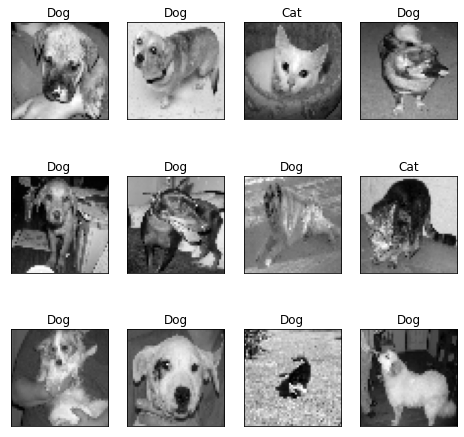

In [87]:
fig = plt.figure(figsize=(8,8))
for num, data in enumerate(train_df[:12]):
    img_label = data[1]
    img_data = data[0]
    #print(img_data)
    y= fig.add_subplot(3,4,num+1)    
    if np.argmax(img_label) == 1:str_label = 'Dog'
    else :str_label = 'Cat'   
    y.imshow(img_data, cmap='gray')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
    
plt.show()    

Like the train dataset created a test data set with labelling for dog and cats and first few images of the test data sare below:

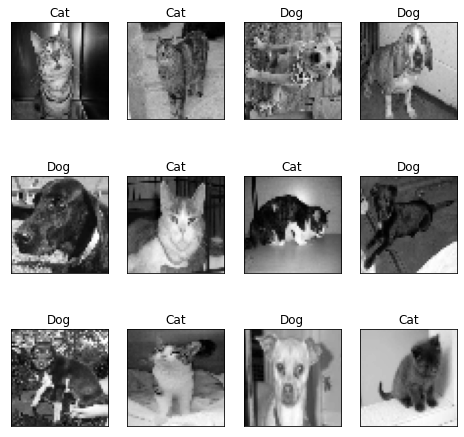

In [92]:
fig = plt.figure(figsize=(8,8))
for num, data in enumerate(test_df[:12]):
    img_label_test = data[1]
    img_data_test = data[0]
    #print(img_data)
    y= fig.add_subplot(3,4,num+1)    
    if np.argmax(img_label_test) == 1:str_label = 'Dog'
    else :str_label = 'Cat'   
    y.imshow(img_data_test, cmap='gray')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
    
plt.show()    

In [89]:
def creat_test_df():
    test_df = []
    for img in tqdm(os.listdir(Test_dir)):
        label = label_img(img )        
        path = os.path.join(Test_dir,img)        
        img = cv2.resize(cv2.imread(path,cv2.IMREAD_GRAYSCALE),(img_size,img_size))      
        test_df.append([np.array(img),np.array(label)])
    shuffle(test_df)
    np.save('test_df.npy',train_df)
    return test_df

In [93]:
test_df = creat_test_df()

100%|██████████| 2023/2023 [00:02<00:00, 746.91it/s] 


In [ ]:
#train = np.load(train_df.npy)

## Data modelling

After creating train and test data, now we will use the convolutional neural network for classifying our data.
Before deploying the model, we splitted the images of test and train set as X and labels as Y.


At first we use two hidden layers with 'relu' activation and 'catagorical crossentrpy ' loss function.

In [117]:
import tflearn

from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression
#import tflearn.datasets.mnist as mnist


convnet = input_data(shape=[None, 50, 50, 1], name='input')

convnet = conv_2d(convnet, 32, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 64, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = fully_connected(convnet, 1024, activation='relu')
convnet = dropout(convnet, 0.8)

convnet = fully_connected(convnet, 2, activation='softmax')
convnet = regression(convnet, optimizer='adam', learning_rate=lr, loss='categorical_crossentropy', name='targets')

model = tflearn.DNN(convnet,tensorboard_dir='log')


In [111]:
if os.path.exists('{}.meta'.format(model_name)):
    model.load(model_name)
    print('model loaded!')

In [112]:
train_df[1][1]

array([0, 1])

In [113]:
train_X =np.array([i[0] for i in train_df]).reshape(-1,img_size,img_size,1)
train_Y = [i[1] for i in train_df]
train_X = train_X/255

In [114]:
test_X = np.array([i[0] for i in test_df]).reshape(-1,img_size,img_size,1)
test_Y = [i[1] for i in test_df]
test_X=test_X/255

The  result summary of this model is given below:

In [118]:

model.fit({'input': train_X}, {'targets': train_Y}, n_epoch=5, validation_set=({'input': test_X}, {'targets': test_Y}), 
     snapshot_step=500,show_metric=True, run_id=model_name)

Training Step: 629  | total loss: 0.32839 | time: 23.866s
| Adam | epoch: 005 | loss: 0.32839 - acc: 0.8652 -- iter: 8000/8005
Training Step: 630  | total loss: 0.33483 | time: 25.846s
| Adam | epoch: 005 | loss: 0.33483 - acc: 0.8599 | val_loss: 0.58785 - val_acc: 0.7326 -- iter: 8005/8005
--


The accuracy of prediction is 0.76, this accuracy is relatively good for a simple network with epoch size of 5. We will try to improve our accuracy by including two more hidden layer.

In [31]:
#tensorboard -- logdir = foo:Users/vidhyas/Data_Science/IBM/pyProjects/Neural Network/CNN/cat_vs_dog/log

In [125]:
tf.compat.v1.reset_default_graph()

convnet = input_data(shape=[None, 50, 50, 1], name='input')

convnet = conv_2d(convnet, 32, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 64, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 32, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)


convnet = conv_2d(convnet, 64, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = fully_connected(convnet, 1024, activation='relu')
convnet = dropout(convnet, 0.8)

convnet = fully_connected(convnet, 2, activation='softmax')
convnet = regression(convnet, optimizer='adam', learning_rate=lr, loss='categorical_crossentropy', name='targets')

model = tflearn.DNN(convnet,tensorboard_dir='log')

In [126]:
model_name = "dogvscats-{}-{}".format(lr,'8conv-basic')
if os.path.exists('{}.meta'.format(model_name)):
    model.load(model_name)
    print('model loaded!')

In [127]:
model.fit({'input': train_X}, {'targets': train_Y}, n_epoch=5, validation_set=({'input': test_X}, {'targets': test_Y}), 
     snapshot_step=500,show_metric=True, run_id=model_name)

Training Step: 629  | total loss: 0.50546 | time: 19.305s
| Adam | epoch: 005 | loss: 0.50546 - acc: 0.7505 -- iter: 8000/8005
Training Step: 630  | total loss: 0.50957 | time: 20.514s
| Adam | epoch: 005 | loss: 0.50957 - acc: 0.7458 | val_loss: 0.53788 - val_acc: 0.7360 -- iter: 8005/8005
--


The accuracy after including two more layer doesnt increase that much, it is still 0.73, so we will try to increase the poch size to 20 and evaluate the prediction accuracy.

In [128]:
model.fit({'input': train_X}, {'targets': train_Y}, n_epoch=20, validation_set=({'input': test_X}, {'targets': test_Y}), 
     snapshot_step=500,show_metric=True, run_id=model_name)

Training Step: 3149  | total loss: 0.05293 | time: 19.535s
| Adam | epoch: 025 | loss: 0.05293 - acc: 0.9846 -- iter: 8000/8005
Training Step: 3150  | total loss: 0.05284 | time: 20.862s
| Adam | epoch: 025 | loss: 0.05284 - acc: 0.9846 | val_loss: 1.01524 - val_acc: 0.7608 -- iter: 8005/8005
--


The accuracy increased to 0.76 with number of epoch of 20. So far this model gives the best accuracy.

The image of the Dogs and cats with predicted label is given below:

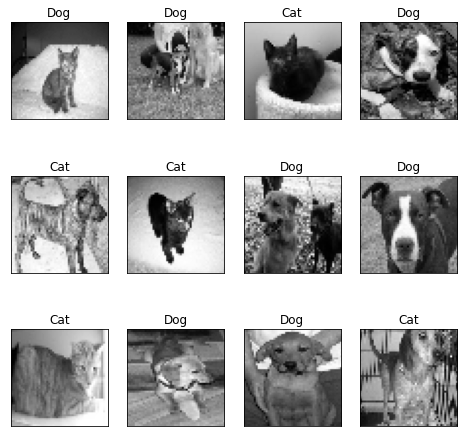

In [129]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))
for num, data in enumerate(test_df[:12]):
    img_label = data[1]
    img_data = data[0]
    
    y= fig.add_subplot(3,4,num+1)
    orig = img_data
    data = img_data.reshape(img_size,img_size,1)
    model_out = model.predict([data])[0] 
    
    if np.argmax(model_out) == 1:str_label = 'Dog'
    else :str_label = 'Cat'
        
    y.imshow(orig, cmap='gray')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
    
plt.show()    

 So our model predicted 10 labels out of 12.

In [136]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [139]:
model_1 = Sequential()


## 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (50, 50), strides = (2,2), padding='same',
                 input_shape=train_X.shape[1:]))
model_1.add(Activation('relu'))

## Another 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2)))
model_1.add(Activation('relu'))

## 2x2 max pooling reduces to 3 x 3 x 32
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))

## Flatten turns 3x3x32 into 288x1
model_1.add(Flatten())
model_1.add(Dense(512))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(2))
model_1.add(Activation('softmax'))

model_1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 25, 25, 32)        80032     
_________________________________________________________________
activation_3 (Activation)    (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 32)        25632     
_________________________________________________________________
activation_4 (Activation)    (None, 11, 11, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)              

In [141]:
import keras

In [144]:
train_Y = np.array(train_Y)

In [147]:
batch_size = 32

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0005, decay=1e-6)

# Let's train the model using RMSprop
model_1.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

history_1 = model_1.fit(train_X, train_Y,
              batch_size=batch_size,
              epochs=5,
              validation_data=(train_X, train_Y),
              shuffle=True)

Train on 8005 samples, validate on 8005 samples
Epoch 1/5
8005/8005 [==============================] - 202s 25ms/sample - loss: 0.6537 - acc: 0.6110 - val_loss: 0.6463 - val_acc: 0.6284
Epoch 2/5
8005/8005 [==============================] - 205s 26ms/sample - loss: 0.6434 - acc: 0.6309 - val_loss: 0.6416 - val_acc: 0.6381
Epoch 3/5
8005/8005 [==============================] - 200s 25ms/sample - loss: 0.6432 - acc: 0.6250 - val_loss: 0.6296 - val_acc: 0.6481
Epoch 4/5
8005/8005 [==============================] - 203s 25ms/sample - loss: 0.6424 - acc: 0.6335 - val_loss: 0.6201 - val_acc: 0.6511
Epoch 5/5
8005/8005 [==============================] - 204s 26ms/sample - loss: 0.6379 - acc: 0.6346 - val_loss: 0.6364 - val_acc: 0.6234


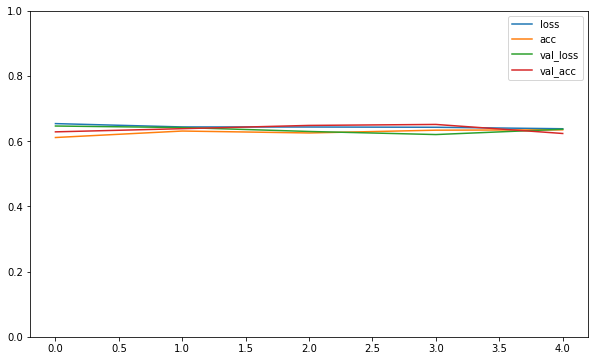

In [149]:
pd.DataFrame(history_1.history).plot(figsize=(10,6)) #plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [150]:
history_2 = model_1.fit(train_X, train_Y,
              batch_size=batch_size,
              epochs=15,
              validation_data=(train_X, train_Y),
              shuffle=True)

Train on 8005 samples, validate on 8005 samples
Epoch 1/15
8005/8005 [==============================] - 190s 24ms/sample - loss: 0.6348 - acc: 0.6369 - val_loss: 0.6314 - val_acc: 0.6458
Epoch 2/15
8005/8005 [==============================] - 253s 32ms/sample - loss: 0.6391 - acc: 0.6306 - val_loss: 0.6315 - val_acc: 0.6425
Epoch 3/15
8005/8005 [==============================] - 194s 24ms/sample - loss: 0.6298 - acc: 0.6423 - val_loss: 0.6283 - val_acc: 0.6477
Epoch 4/15
8005/8005 [==============================] - 227s 28ms/sample - loss: 0.6294 - acc: 0.6473 - val_loss: 0.6654 - val_acc: 0.6062
Epoch 5/15
8005/8005 [==============================] - 277s 35ms/sample - loss: 0.6288 - acc: 0.6507 - val_loss: 0.6123 - val_acc: 0.6640
Epoch 6/15
8005/8005 [==============================] - 234s 29ms/sample - loss: 0.6243 - acc: 0.6498 - val_loss: 0.6365 - val_acc: 0.6380
Epoch 7/15
8005/8005 [==============================] - 234s 29ms/sample - loss: 0.6243 - acc: 0.6545 - val_loss: 0.62

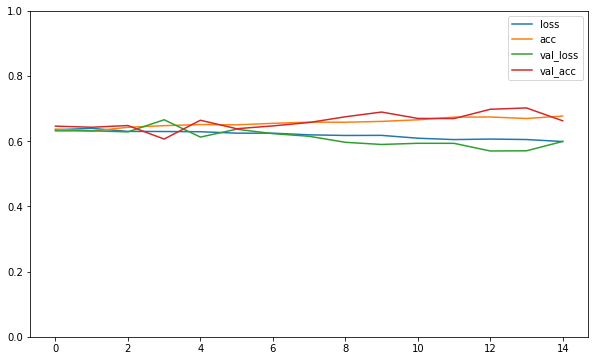

In [151]:
pd.DataFrame(history_2.history).plot(figsize=(10,6)) #plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [152]:
history_2 = model_1.fit(train_X, train_Y,
              batch_size=batch_size,
              epochs=25,
              validation_data=(train_X, train_Y),
              shuffle=True)

Train on 8005 samples, validate on 8005 samples
Epoch 1/25
8005/8005 [==============================] - 266s 33ms/sample - loss: 0.5928 - acc: 0.6770 - val_loss: 0.5708 - val_acc: 0.7029
Epoch 2/25
8005/8005 [==============================] - 276s 35ms/sample - loss: 0.5926 - acc: 0.6869 - val_loss: 0.5587 - val_acc: 0.7053
Epoch 3/25
8005/8005 [==============================] - 300s 37ms/sample - loss: 0.5910 - acc: 0.6868 - val_loss: 0.5542 - val_acc: 0.7183
Epoch 4/25
8005/8005 [==============================] - 235s 29ms/sample - loss: 0.5843 - acc: 0.6903 - val_loss: 0.5413 - val_acc: 0.7238
Epoch 5/25
8005/8005 [==============================] - 240s 30ms/sample - loss: 0.5825 - acc: 0.6927 - val_loss: 0.5740 - val_acc: 0.6982
Epoch 6/25
8005/8005 [==============================] - 232s 29ms/sample - loss: 0.5761 - acc: 0.6963 - val_loss: 0.5403 - val_acc: 0.7253
Epoch 7/25
8005/8005 [==============================] - 219s 27ms/sample - loss: 0.5750 - acc: 0.6924 - val_loss: 0.52

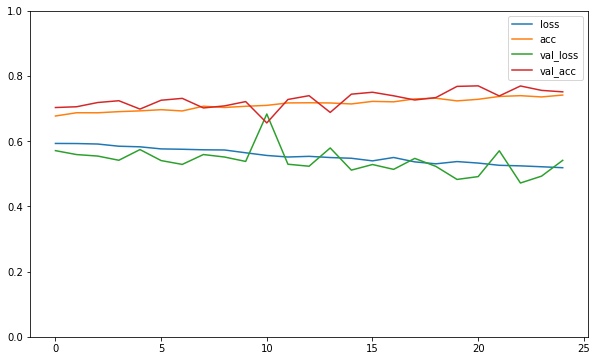

In [153]:
pd.DataFrame(history_2.history).plot(figsize=(10,6)) #plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [154]:
model_2 = Sequential()


## 5x5 convolution with 2x2 stride and 32 filters
model_2.add(Conv2D(32, (50, 50), strides = (2,2), padding='same',
                 input_shape=train_X.shape[1:]))
model_2.add(Activation('elu'))

## Another 5x5 convolution with 2x2 stride and 32 filters
model_2.add(Conv2D(32, (5, 5), strides = (2,2)))
model_2.add(Activation('elu'))

## 2x2 max pooling reduces to 3 x 3 x 32
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))

## Flatten turns 3x3x32 into 288x1
model_2.add(Flatten())
model_2.add(Dense(512))
model_2.add(Activation('elu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(2))
model_2.add(Activation('softmax'))

model_2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 25, 25, 32)        80032     
_________________________________________________________________
activation_7 (Activation)    (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 32)        25632     
_________________________________________________________________
activation_8 (Activation)    (None, 11, 11, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 800)              

In [157]:
batch_size = 32

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0005, decay=1e-6)

# Let's train the model using RMSprop
model_2.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])


history_3 = model_2.fit(train_X, train_Y,
              batch_size=batch_size,
              epochs=25,
              validation_data=(train_X, train_Y),
              shuffle=True)

Train on 8005 samples, validate on 8005 samples
Epoch 1/25
8005/8005 [==============================] - ETA: 0s - loss: 1.0241 - acc: 0.5068

/Users/vidhyas/miniconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


8005/8005 [==============================] - 184s 23ms/sample - loss: 1.0241 - acc: 0.5068 - val_loss: 0.7515 - val_acc: 0.5214
Epoch 2/25
8005/8005 [==============================] - 189s 24ms/sample - loss: 0.7448 - acc: 0.5275 - val_loss: 0.6780 - val_acc: 0.5485
Epoch 3/25
8005/8005 [==============================] - 189s 24ms/sample - loss: 0.7127 - acc: 0.5478 - val_loss: 0.7802 - val_acc: 0.5018
Epoch 4/25
8005/8005 [==============================] - 294s 37ms/sample - loss: 0.6927 - acc: 0.5631 - val_loss: 0.7097 - val_acc: 0.5525
Epoch 5/25
8005/8005 [==============================] - 238s 30ms/sample - loss: 0.6678 - acc: 0.5966 - val_loss: 0.6811 - val_acc: 0.5638
Epoch 6/25
8005/8005 [==============================] - 205s 26ms/sample - loss: 0.6405 - acc: 0.6315 - val_loss: 0.6449 - val_acc: 0.6207
Epoch 7/25
8005/8005 [==============================] - 217s 27ms/sample - loss: 0.6182 - acc: 0.6568 - val_loss: 0.6097 - val_acc: 0.6538
Epoch 8/25
8005/8005 [================

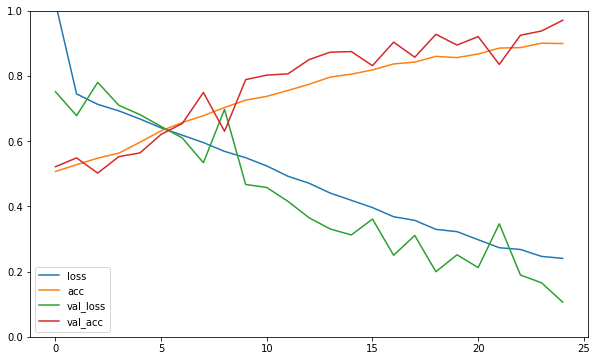

In [158]:
pd.DataFrame(history_3.history).plot(figsize=(10,6)) #plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [163]:
predict_y=model_2.predict_classes(test_X)

/Users/vidhyas/miniconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/Users/vidhyas/miniconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


## Analysis and Conclusion

The aim of this project was to classify a image data set containing pictures of dog and cats to correct catagory.
We used the Convolutional neural network and summary of its result is given below:


In [180]:
import pandas as pd
results = pd.DataFrame({'model' : ['CNN_5_ epoch','CNN_15_ epoch','CNN_25_ epoch','CNN_elu_activ'],
                       'accuracy' : [ 0.6234,0.6622,0.7510,0.9704]})

In [184]:
import plotly.offline as py
py.init_notebook_mode(connected = True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
table  = ff.create_table(np.round(results,4))
py.iplot(table)

So the model with 25 epoch and elu activation function predicted with 97% accuracy.